# importation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_excel('corona/dataset.xlsx')
df.head(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.730393,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.shape)

(5644, 111)


In [4]:
print(df.isnull().values.any())
print(df.isnull().values.any().mean())

True
1.0


In [5]:
df1 = df.loc[:, df.isnull().mean()<.9]
print(df1.shape)
df1.head(10)

(5644, 39)


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
5,75f16746216c4d1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2a2245e360808d7,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,509197ec73f1400,16,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8bb9d64f0215244,1,negative,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
9,5f1ed301375586c,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


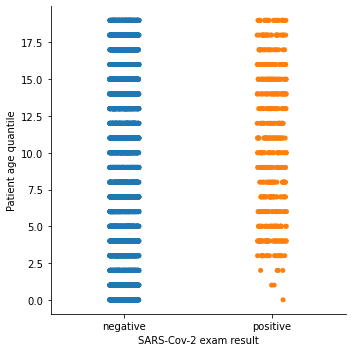

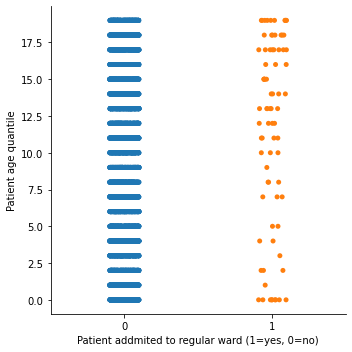

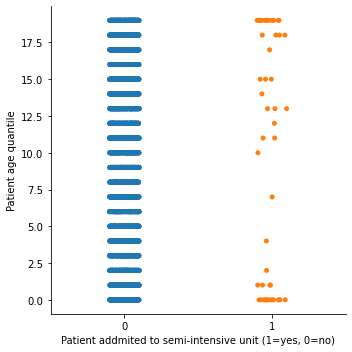

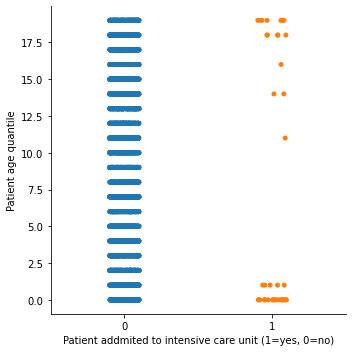

In [6]:
sns.catplot(x='SARS-Cov-2 exam result', y='Patient age quantile', data=df1)
sns.catplot(x='Patient addmited to regular ward (1=yes, 0=no)', y='Patient age quantile', data= df1)
sns.catplot(x='Patient addmited to semi-intensive unit (1=yes, 0=no)', y='Patient age quantile', data=df1)
sns.catplot(x='Patient addmited to intensive care unit (1=yes, 0=no)', y='Patient age quantile', data=df1)

In [7]:
df1 = df1.fillna(0)
print(df1.isnull().values.any())
df1.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 39 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient ID                                             5644 non-null   object 
 1   Patient age quantile                                   5644 non-null   int64  
 2   SARS-Cov-2 exam result                                 5644 non-null   object 
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64  
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64  
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64  
 6   Hematocrit                                             5644 non-null   float64
 7   Hemoglobin                                             5644 non-null   float64
 8   Platelets                                 

In [8]:
features = df1.drop(['Patient ID', 'SARS-Cov-2 exam result', 'Basophils', 'Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit', 'Platelets', 'Mean platelet volume ', 'Lymphocytes', 'Influenza B, rapid test'], axis=1)
targets = df['SARS-Cov-2 exam result']
print('les targets: ', targets.shape, '\nles features:', features.shape)
features.head(20)

les targets:  (5644,) 
les features: (5644, 28)


,Patient age quantile,Hemoglobin,Red blood Cells,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),...,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza A, rapid test"
0,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,17,-0.022340,0.102004,-0.950790,-0.094610,-0.292269,1.482158,0.166192,0.357547,-0.625073,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative
2,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0
5,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
6,13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,1,-0.774212,-0.850035,3.331071,0.364550,0.178175,1.018625,-1.336024,0.068652,-0.978899,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0
9,17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,0


# preprocessing

In [9]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient age quantile                              5644 non-null   int64  
 1   Hemoglobin                                        5644 non-null   float64
 2   Red blood Cells                                   5644 non-null   float64
 3   Mean corpuscular hemoglobin concentration (MCHC)  5644 non-null   float64
 4   Leukocytes                                        5644 non-null   float64
 5   Mean corpuscular hemoglobin (MCH)                 5644 non-null   float64
 6   Eosinophils                                       5644 non-null   float64
 7   Mean corpuscular volume (MCV)                     5644 non-null   float64
 8   Monocytes                                         5644 non-null   float64
 9   Red blood cell dist

In [10]:
#encoding
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector

encoderOrdinal = OrdinalEncoder()
encoderLabel = LabelEncoder()

transformColumn = make_column_transformer((encoderOrdinal, 
                                   make_column_selector(dtype_include=np.number)))
features = transformColumn.fit_transform(features)
targets = encoderLabel.fit_transform(targets)

print(features)
print(targets)

[[ 13.  47. 108. ...  99.  61.  19.]
 [ 17.  46. 114. ... 108.  74.  11.]
 [  8.  47. 108. ...  99.  61.  19.]
 ...
 [  4.  47. 108. ...  99.  61.  19.]
 [ 10.  47. 108. ...  99.  61.  19.]
 [ 19.  56. 141. ... 101.  82.  16.]]
[0 0 0 ... 0 0 1]


In [11]:
from sklearn.feature_selection import SelectKBest, chi2
chi2(features, targets)
select = SelectKBest(chi2, k=10)
select.fit_transform(features, targets)
print(select.get_support())

[ True  True  True  True  True  True  True  True  True  True]


In [12]:
#train test split
from sklearn.model_selection import train_test_split, learning_curve
fea_train, fea_test, tar_train, tar_test = train_test_split(features, targets, test_size=.2)
print(f'feature= {fea_train.shape, fea_test.shape}')
print(f'targets = {tar_train.shape, tar_test.shape}')

feature= ((4515, 10), (1129, 10))
targets = ((4515,), (1129,))


# modeling

In [13]:
#standardscaler and make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier

#create variable for standardscaler
modelSVC = Pipeline([('standard', StandardScaler()),
                    ('classifierSVC', SVC())])

modelSGD = Pipeline([('standard', StandardScaler()),
                    ('classifierSVC', SGDClassifier())])

modelLinear = Pipeline([('standard', MinMaxScaler()),
                    ('classifierSVC', LinearSVC())])


In [14]:
modelSVC.fit(fea_train, tar_train)
score1 = modelSVC.score(fea_test, tar_test)
print(score1)

modelSGD.fit(fea_train, tar_train)
score2 = modelSGD.score(fea_test, tar_test)
print(score2)

modelLinear.fit(fea_train, tar_train)
score3 = modelLinear.score(fea_test, tar_test)
print(score3)

0.9087688219663419
0.8937112488928255
0.9105403011514615


In [15]:
#crossvalscore
from sklearn.model_selection import cross_val_predict

cross_valSVC = cross_val_predict(modelSVC, fea_train, tar_train, cv=3)

cross_valSGD = cross_val_predict(modelSGD, fea_train, tar_train, cv=3)

cross_valLinear = cross_val_predict(modelLinear, fea_train, tar_train, cv=3)

In [16]:
#la donnees attendue
y_train_positive = (tar_train == 1)

In [17]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_positive, cross_valSVC))

[[4057    2]
 [ 455    1]]


In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

print(confusion_matrix(y_train_positive, cross_valSGD))

[[3910  149]
 [ 419   37]]


In [19]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train_positive, cross_valLinear))

[[4056    3]
 [ 452    4]]


In [20]:
#precision_score and recall_score:
print(precision_score(y_train_positive, cross_valSVC))
print(recall_score(y_train_positive, cross_valSVC))

0.3333333333333333
0.0021929824561403508


In [21]:
#precision_score and recall_score:
print(precision_score(y_train_positive, cross_valSGD))
print(recall_score(y_train_positive, cross_valSGD))

0.1989247311827957
0.08114035087719298


In [22]:
#precision_score and recall_score:
print(precision_score(y_train_positive, cross_valLinear))
print(recall_score(y_train_positive, cross_valLinear))

0.5714285714285714
0.008771929824561403


In [23]:
#finalement on choisit le model: modelLinear a cause de ses performances